## Part 1: SQL practice on the Titanic dataset

In this exercise, you will be working with the famous [Titanic dataset](https://www.kaggle.com/competitions/titanic/data) in [BigQuery](https://cloud.google.com/bigquery/docs/sandbox). This dataset contains valuable information about the passengers on the ill-fated Titanic voyage. Your task is to write SQL queries using various functions like SELECT, WHERE, IN, OR, Wildcards, GROUP BY, HAVING, and ORDER BY, as well as perform data aggregations. <br><br>



**MBAi 417 - Data Engineering Project #1**
Authors: Igor Alfimov & Shantanu Phadke

**Problem 1**

Retrieve the first 5 records from the titanic table.

In [ ]:
#Selecting all attributes
SELECT *

#Specified dataset
FROM `mbai-data-engineering.Titanic.Titanic`

#Use LIMIT argument to get specific number of records
LIMIT 5


BigQuery Output: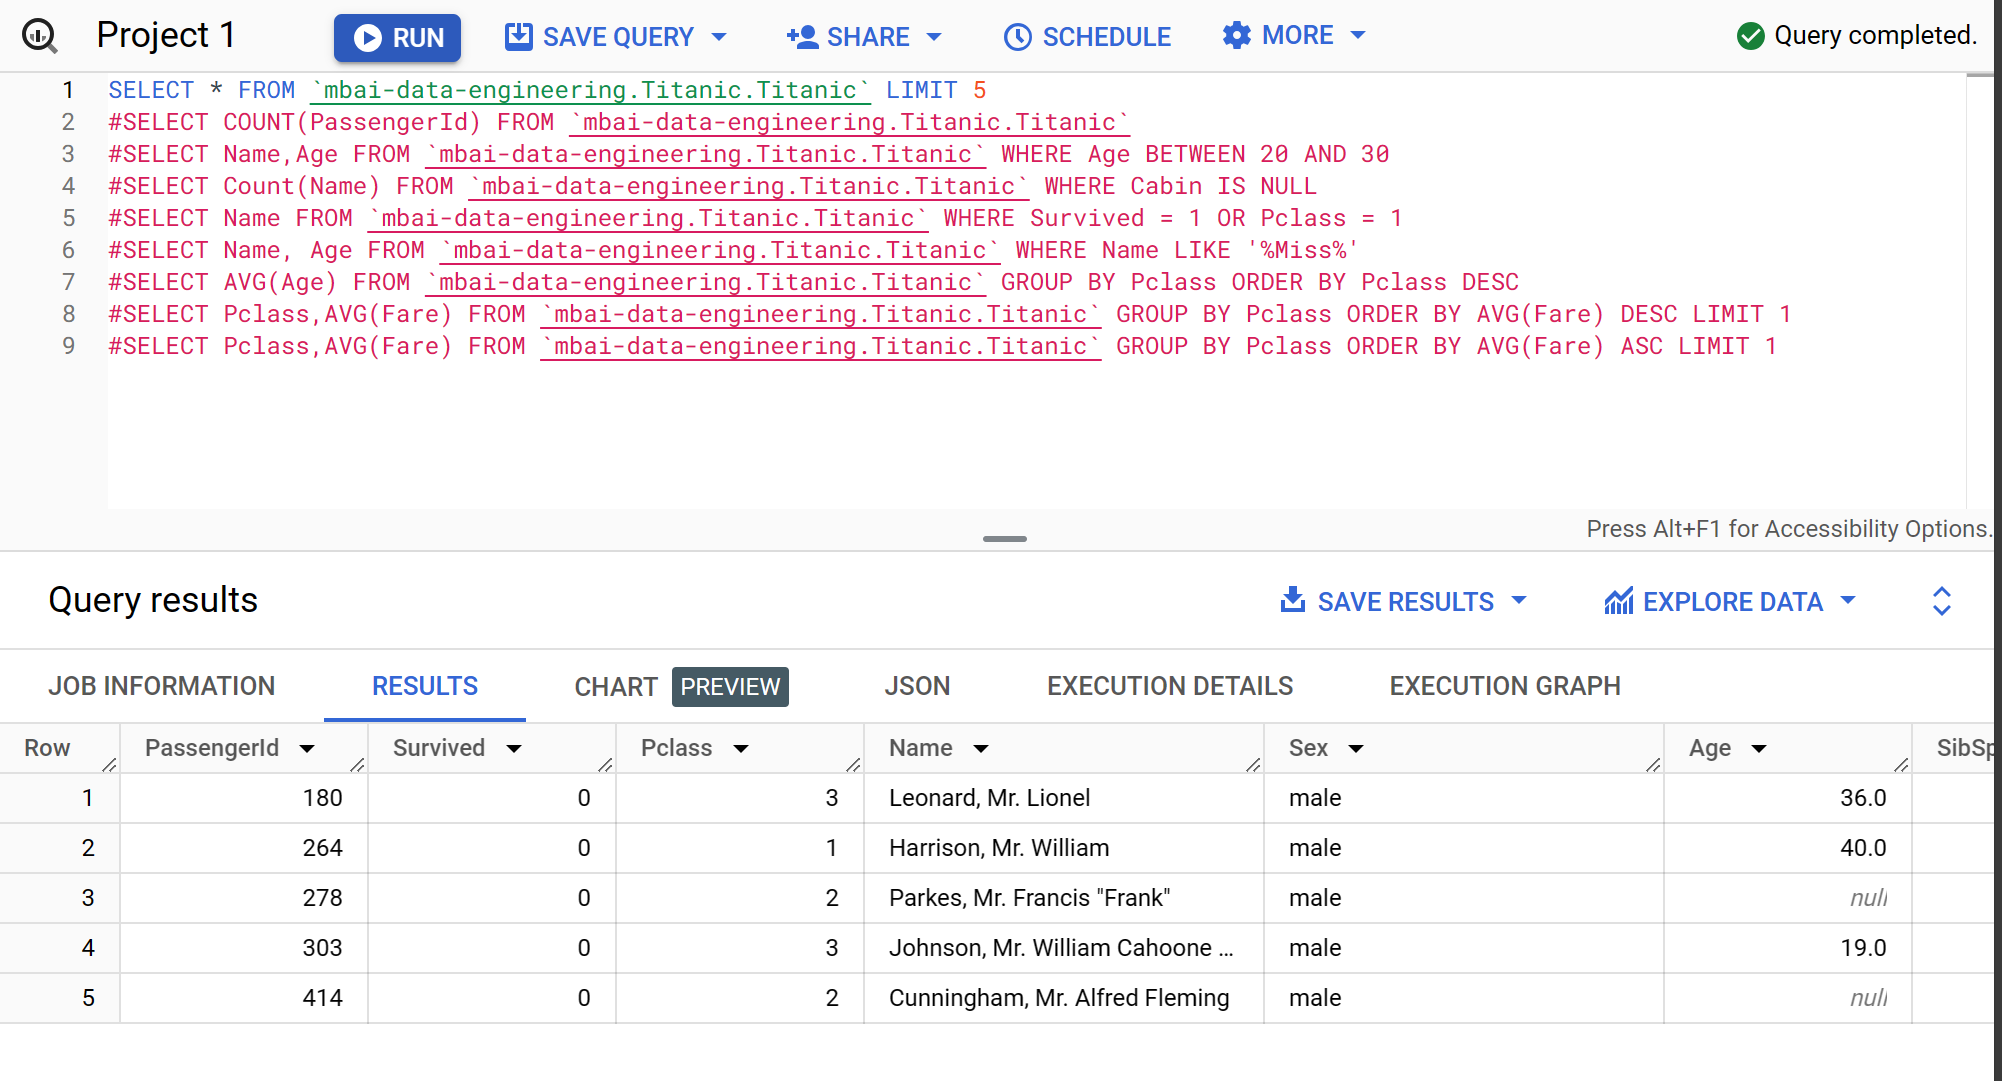

**Problem 2**

Find the total number of passengers in the titanic dataset.

In [ ]:
#Use COUNT argument on a unique identifier and verify for distinct IDs once
SELECT COUNT(DISTINCT PassengerId)

FROM `mbai-data-engineering.Titanic.Titanic`

BigQuery Output: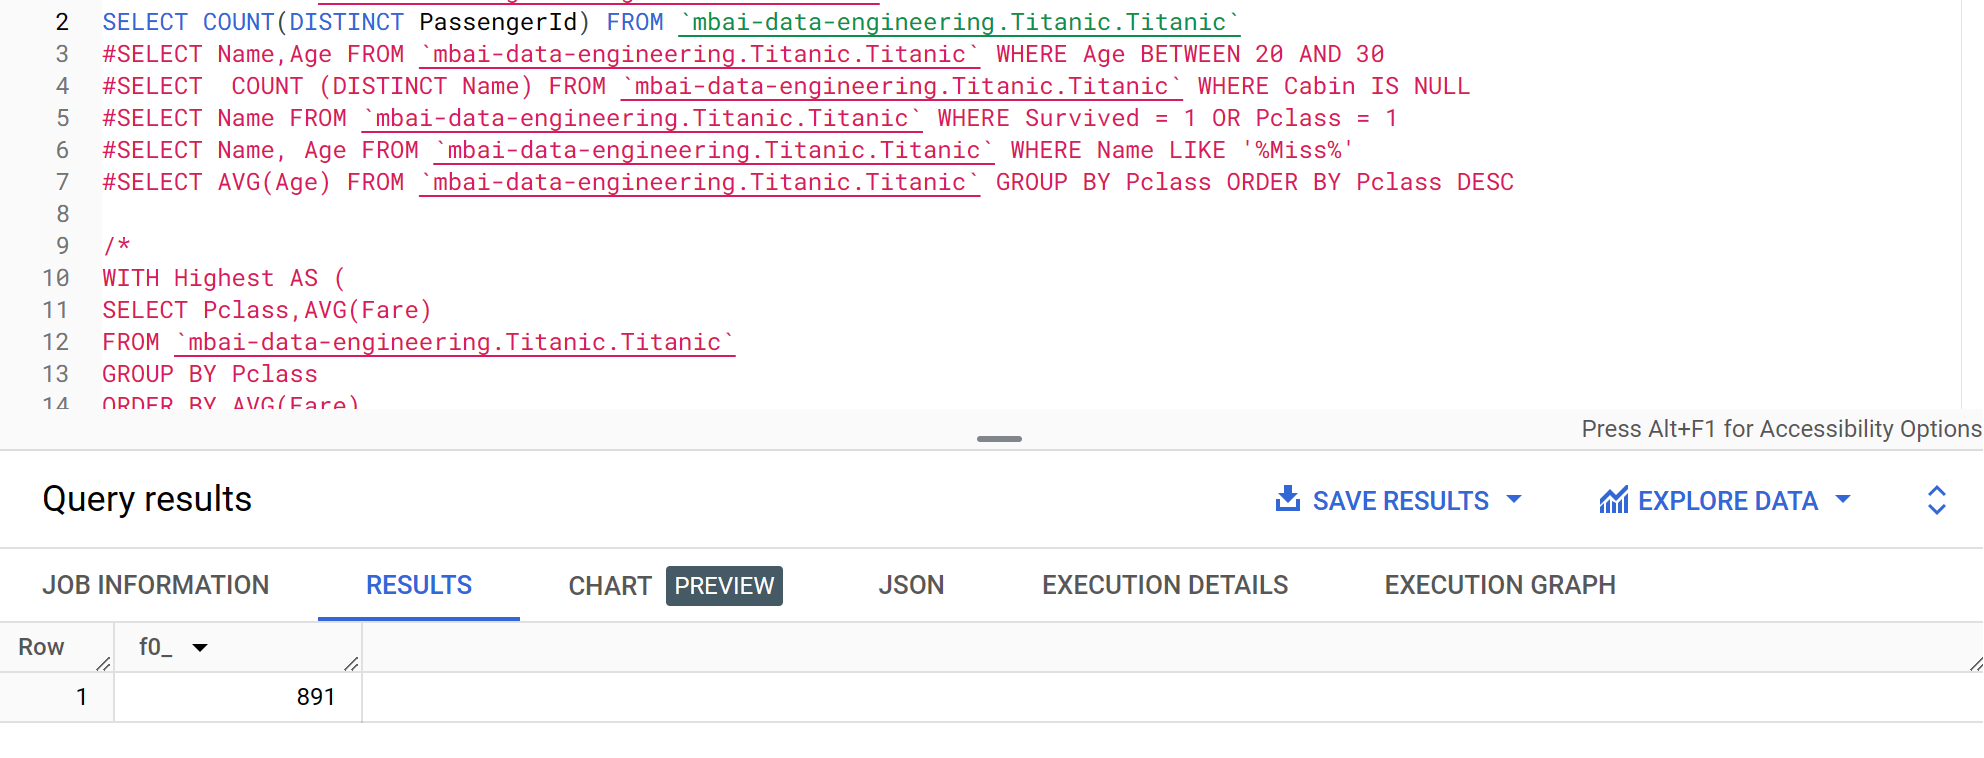

**Problem 3**

Retrieve the names and ages of passengers who were between 20 and 30 years old (inclusive) when they boarded the ship.

In [ ]:
#Retrieve names and age attribute only
SELECT Name,Age

FROM `mbai-data-engineering.Titanic.Titanic`

#Specify range of data using BETWEEN function on Age attribute
WHERE Age BETWEEN 20 AND 30

BigQuery Output:
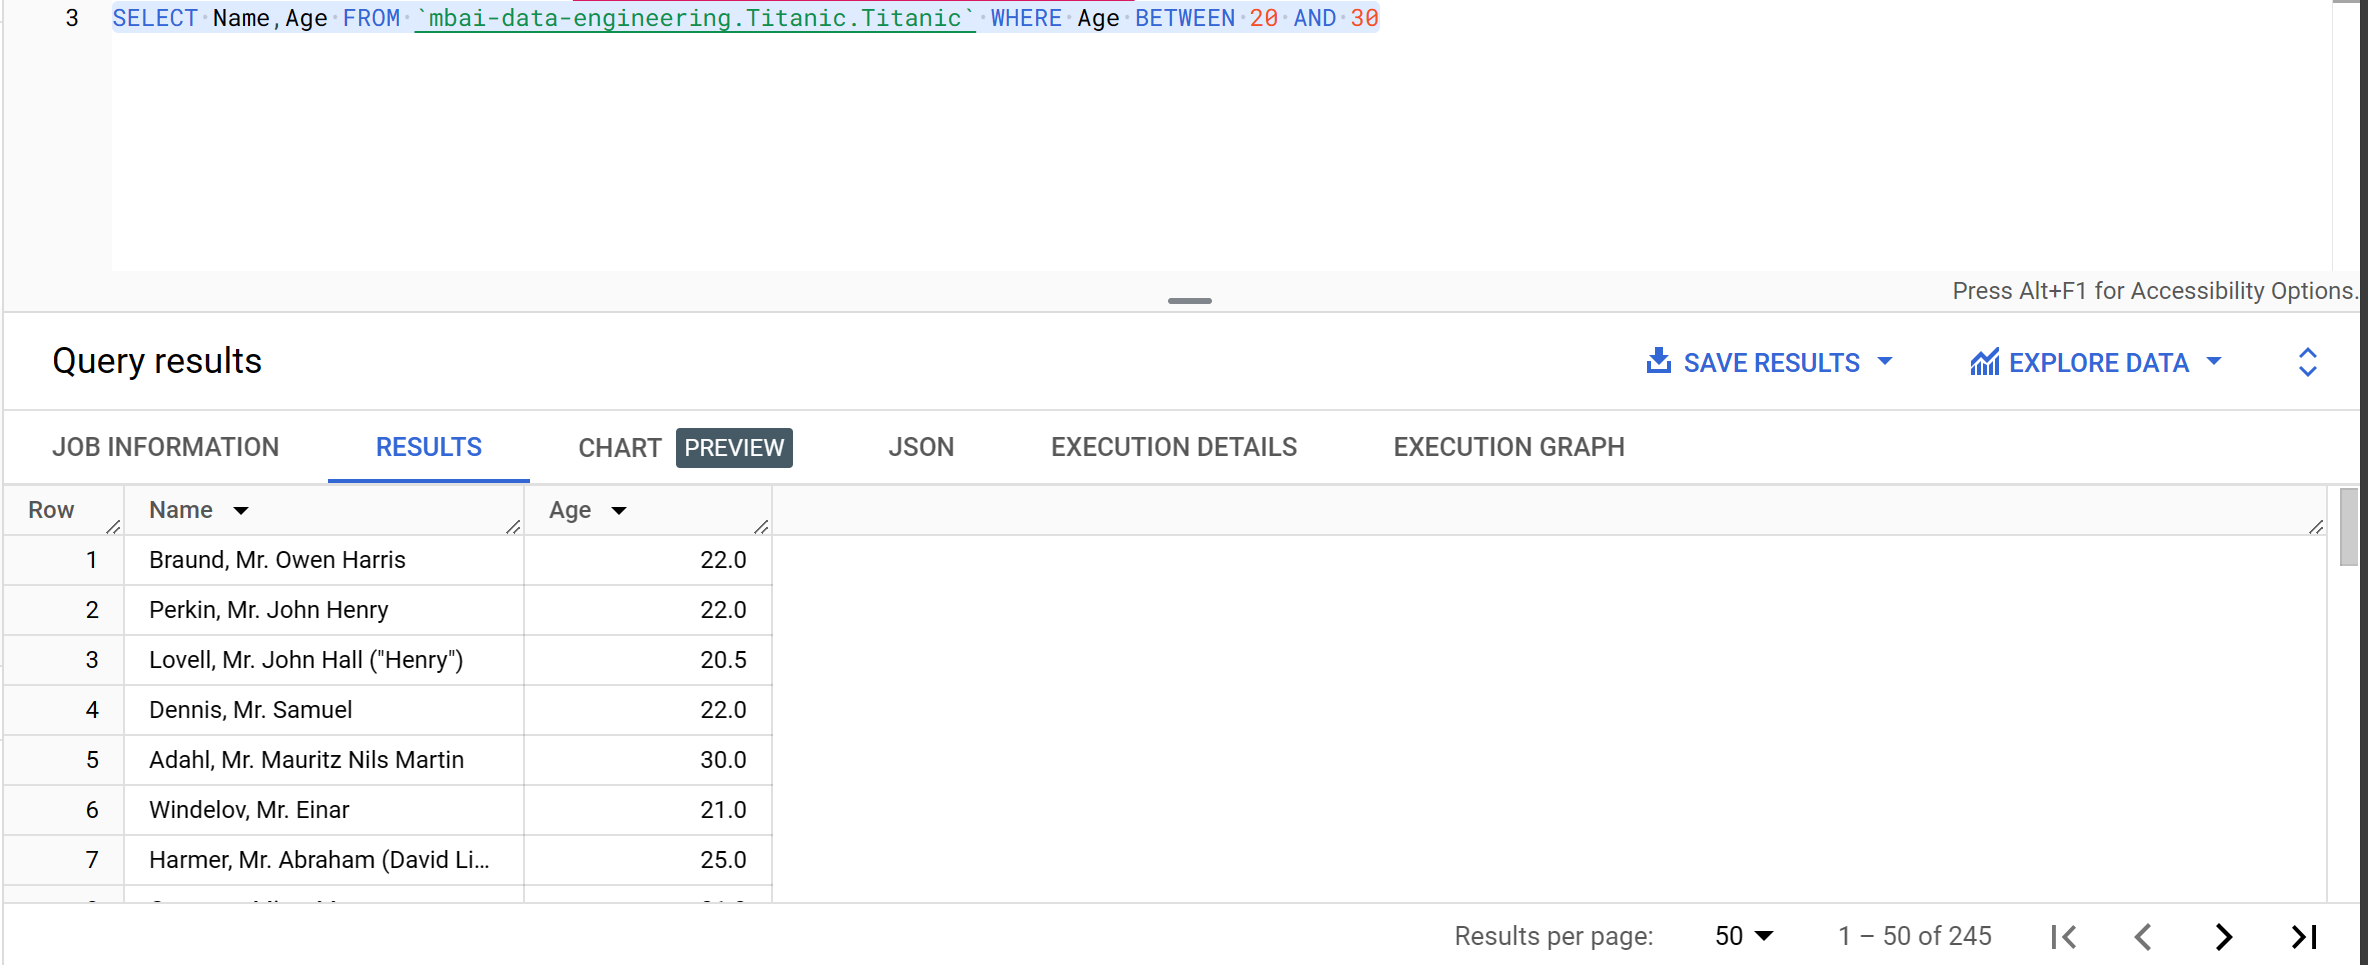

**Problem 4**

Find the number of passengers whose `Cabin` information is missing.






In [ ]:
#Count the filtered rows
SELECT Count(Name)

FROM `mbai-data-engineering.Titanic.Titanic`

#Find rows where cabin information is null (missing)
WHERE Cabin IS NULL

BigQuery Output:
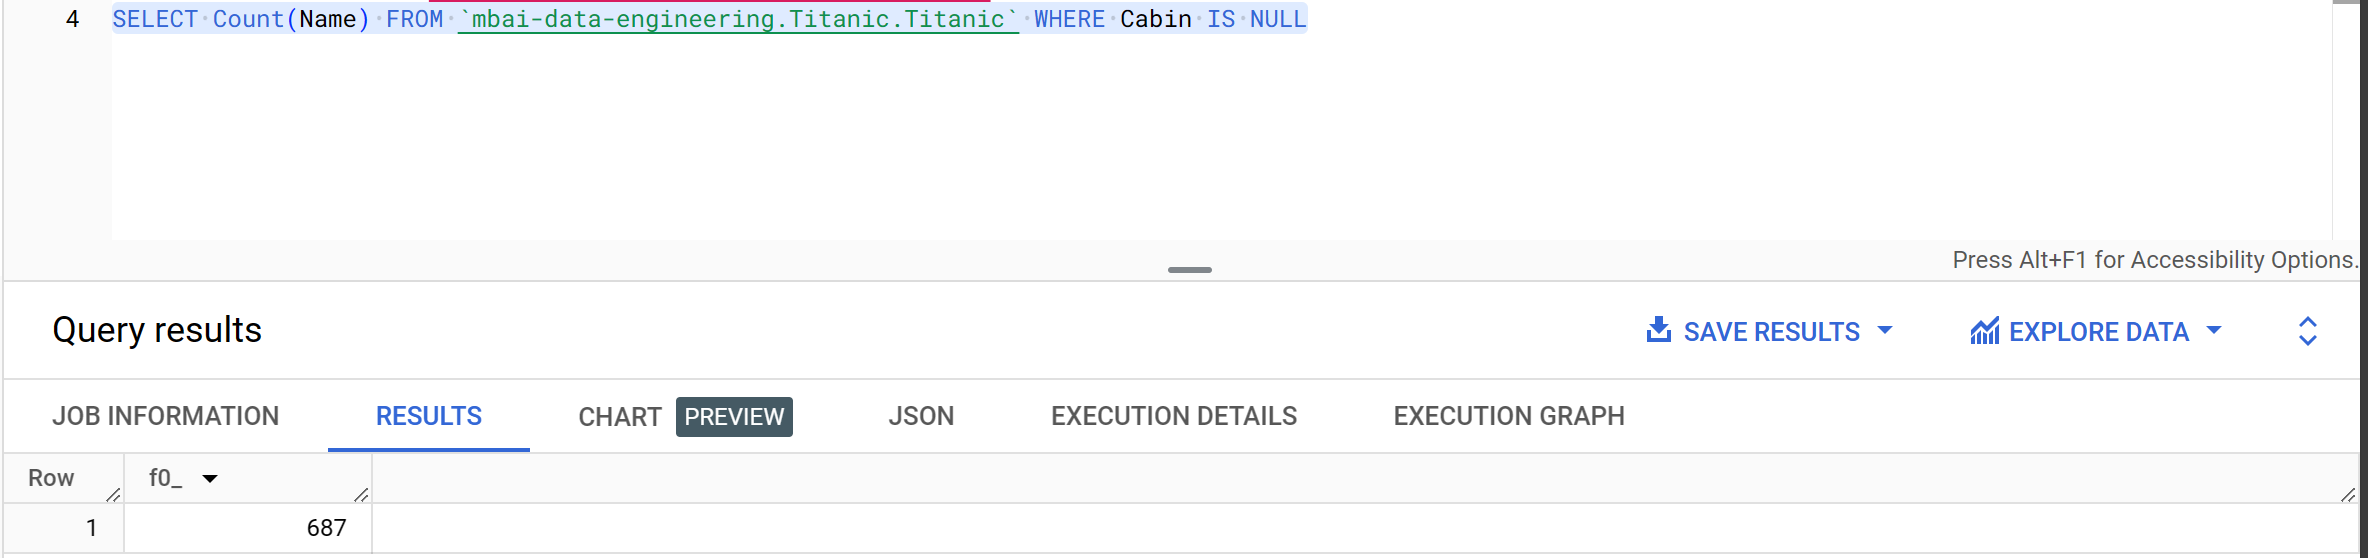

**Problem 5**

Retrieve the names of passengers who either survived (`Survived = 1`) or were in first class (`Pclass = 1`).

In [ ]:
#Return names that meet filter criteria
SELECT Name

FROM `mbai-data-engineering.Titanic.Titanic`

#Use WHERE filter for data satisfying an OR criteria
WHERE Survived = 1 OR Pclass = 1

BigQuery Output: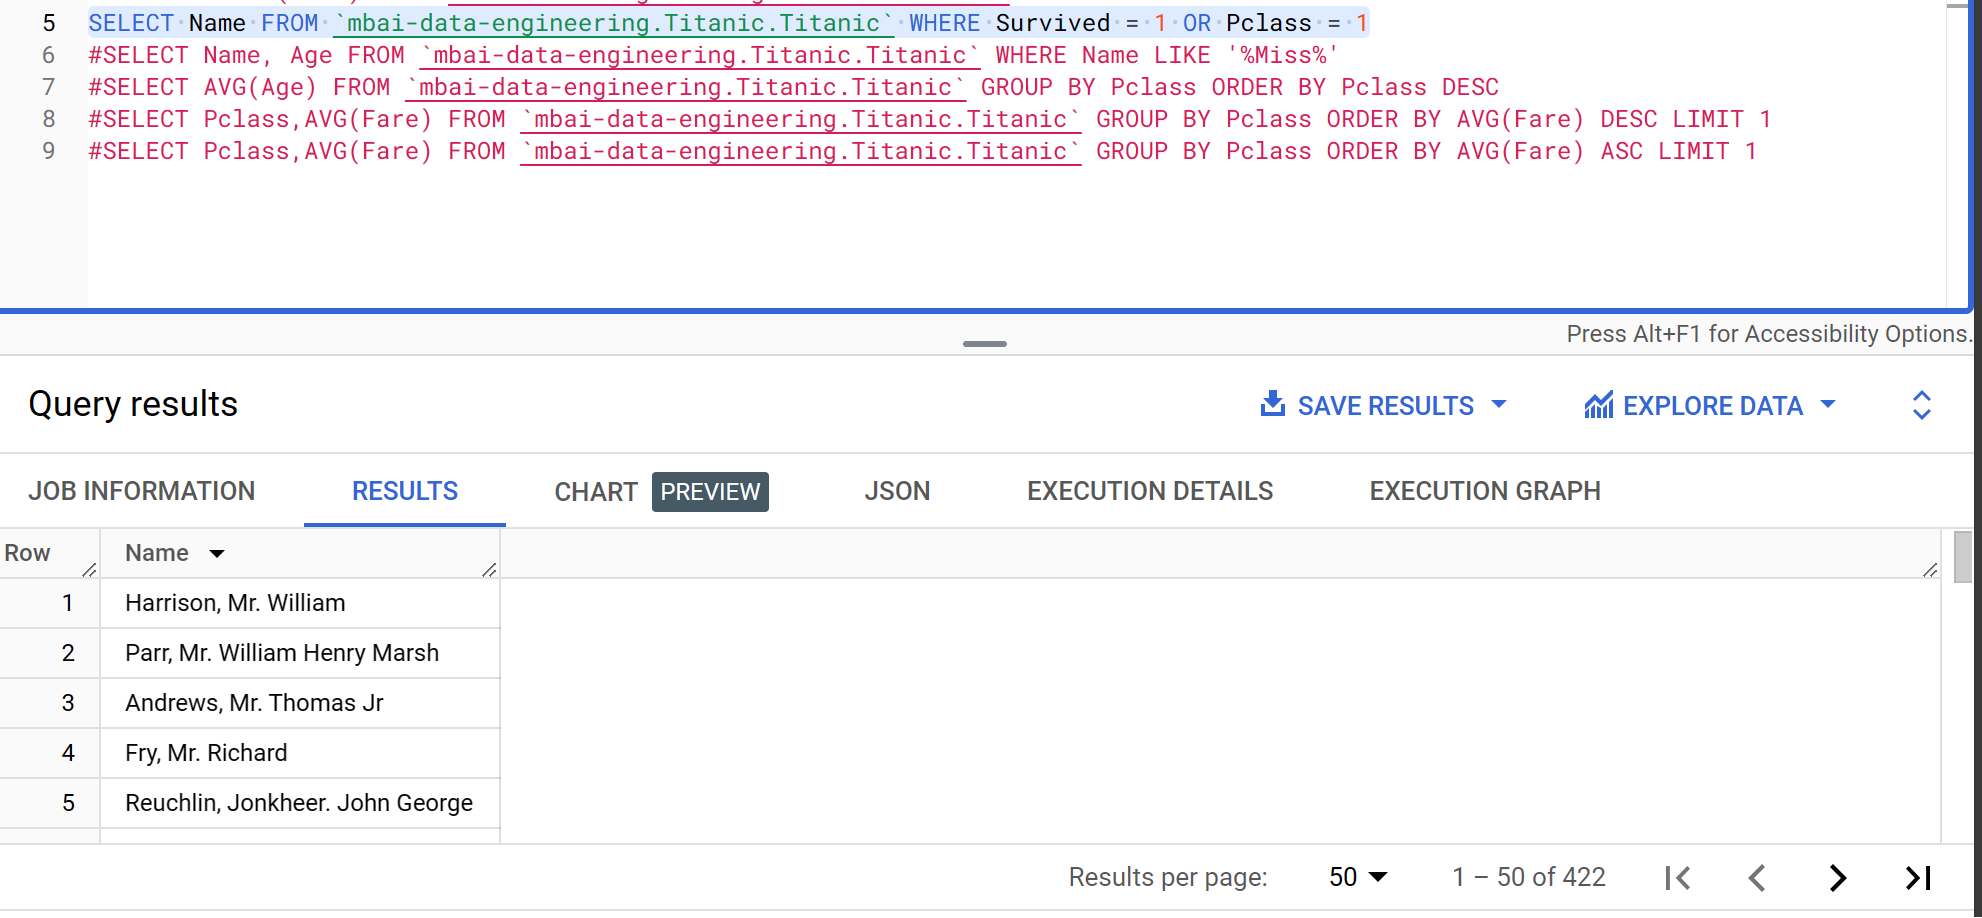

**Problem 6**

Retrieve the names and ages of passengers who have 'Miss' in their `Name` field.

In [ ]:
#Return names and corresponding ages
SELECT Name, Age

FROM `mbai-data-engineering.Titanic.Titanic`

#Use wildcard expression to filter for names that have 'Miss' anywhere
WHERE Name LIKE '%Miss%'

BigQuery Output: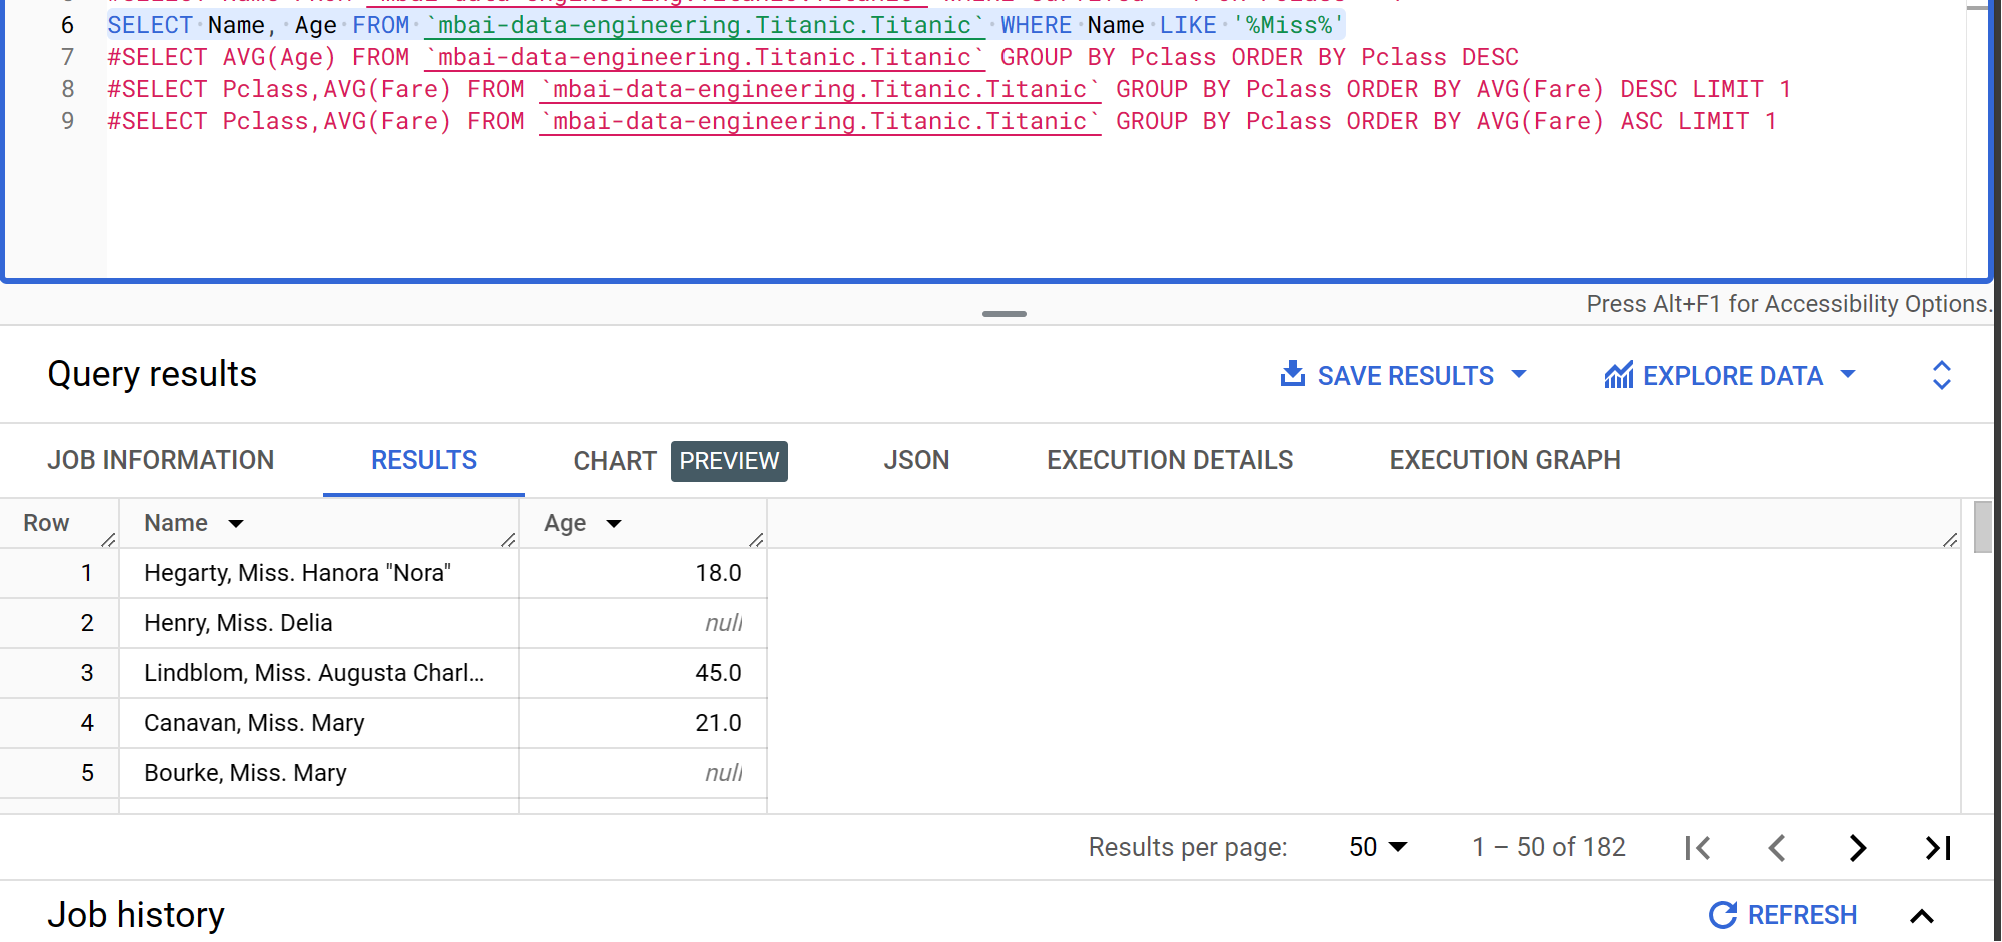

**Problem 7**

Find the average age of passengers for each class. Display the results in descending order of class.

In [ ]:
#Calculate Average age
SELECT AVG(Age)

FROM `mbai-data-engineering.Titanic.Titanic`

#Calculate by class
GROUP BY Pclass

#Order by class value in descending order
ORDER BY Pclass DESC

BigQuery Output: 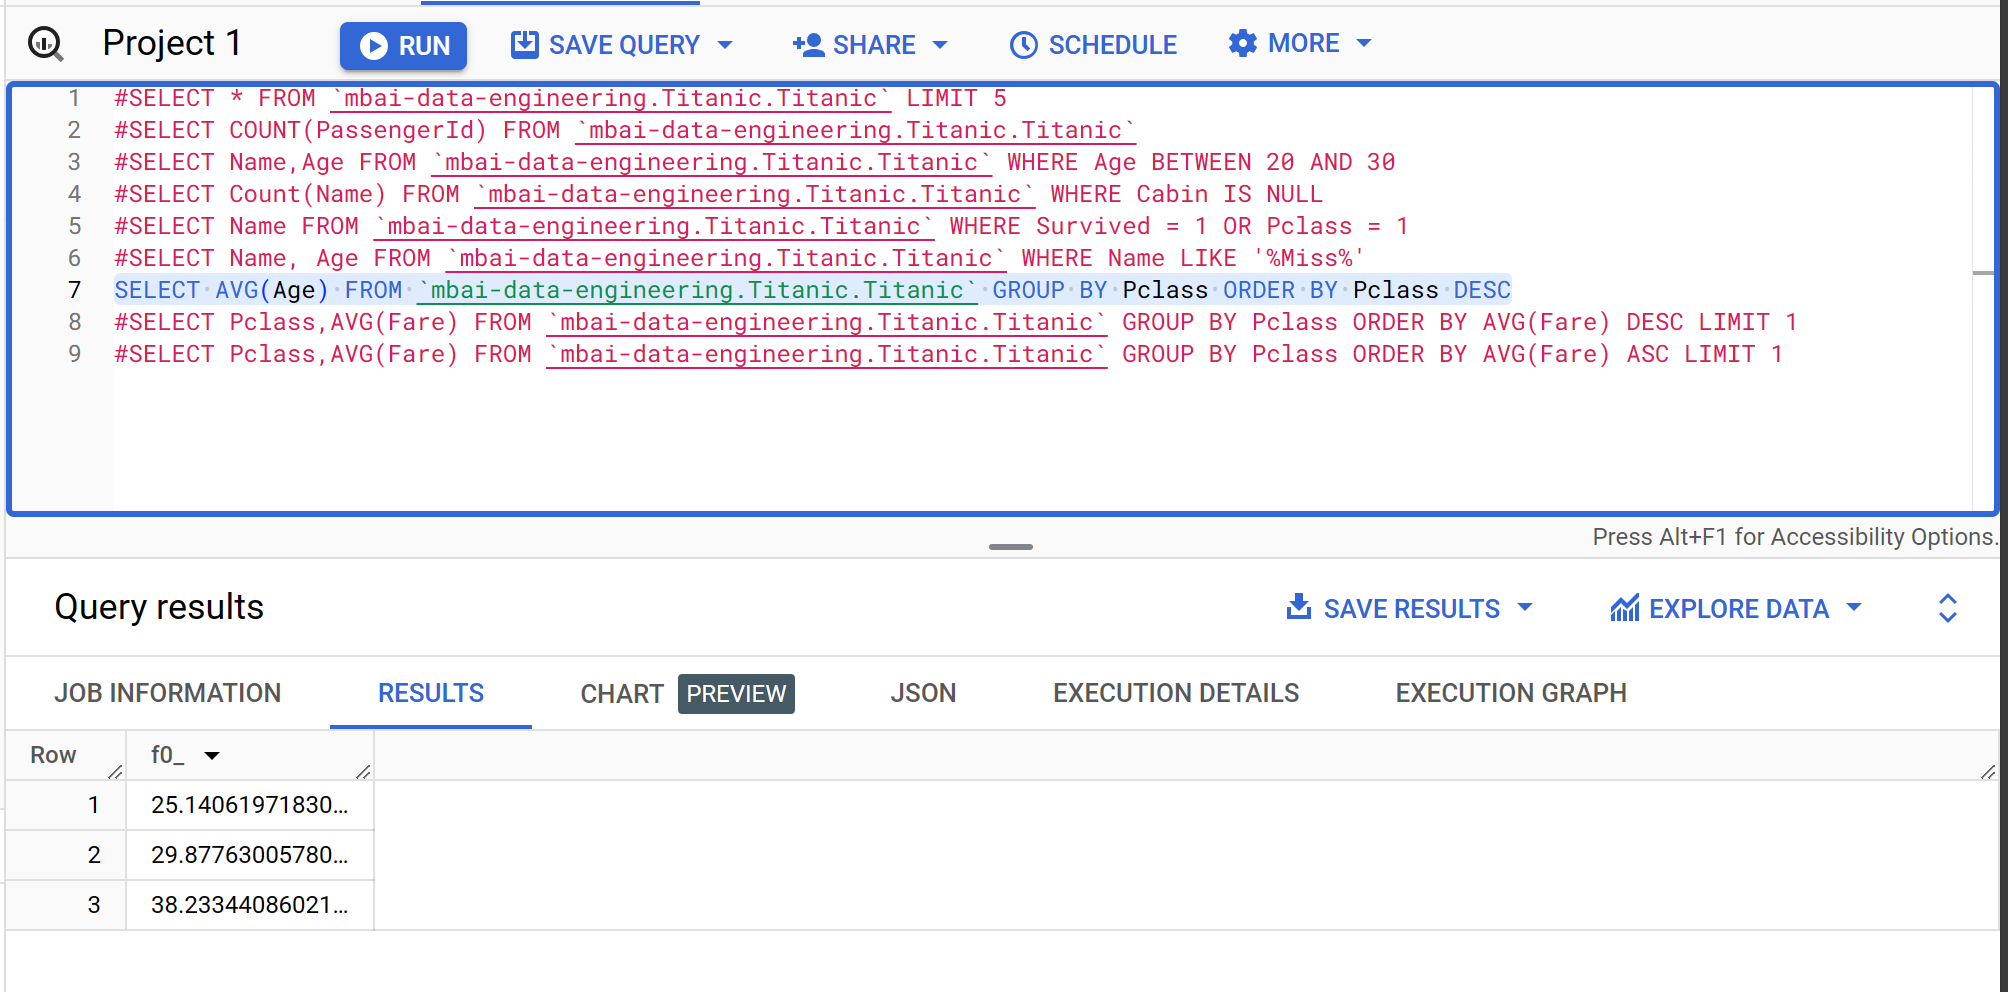

**Problem 8**

Find the class with the highest average fare and the class with the lowest average fare.

In [ ]:
# Use Common Table Expression to store results for highest fare
WITH Highest AS (
SELECT Pclass,AVG(Fare)
FROM `mbai-data-engineering.Titanic.Titanic`
GROUP BY Pclass
# get the highest average fare
ORDER BY AVG(Fare)
DESC LIMIT 1),

# and store results for lowest fare
Lowest AS(
SELECT Pclass,AVG(Fare)
FROM `mbai-data-engineering.Titanic.Titanic`
GROUP BY Pclass
# get the lowest average fare
ORDER BY AVG(Fare)
ASC LIMIT 1)

#Return output from both Highest and Lowest queries
SELECT * FROM Highest UNION ALL SELECT * FROM Lowest

BigQuery Output:
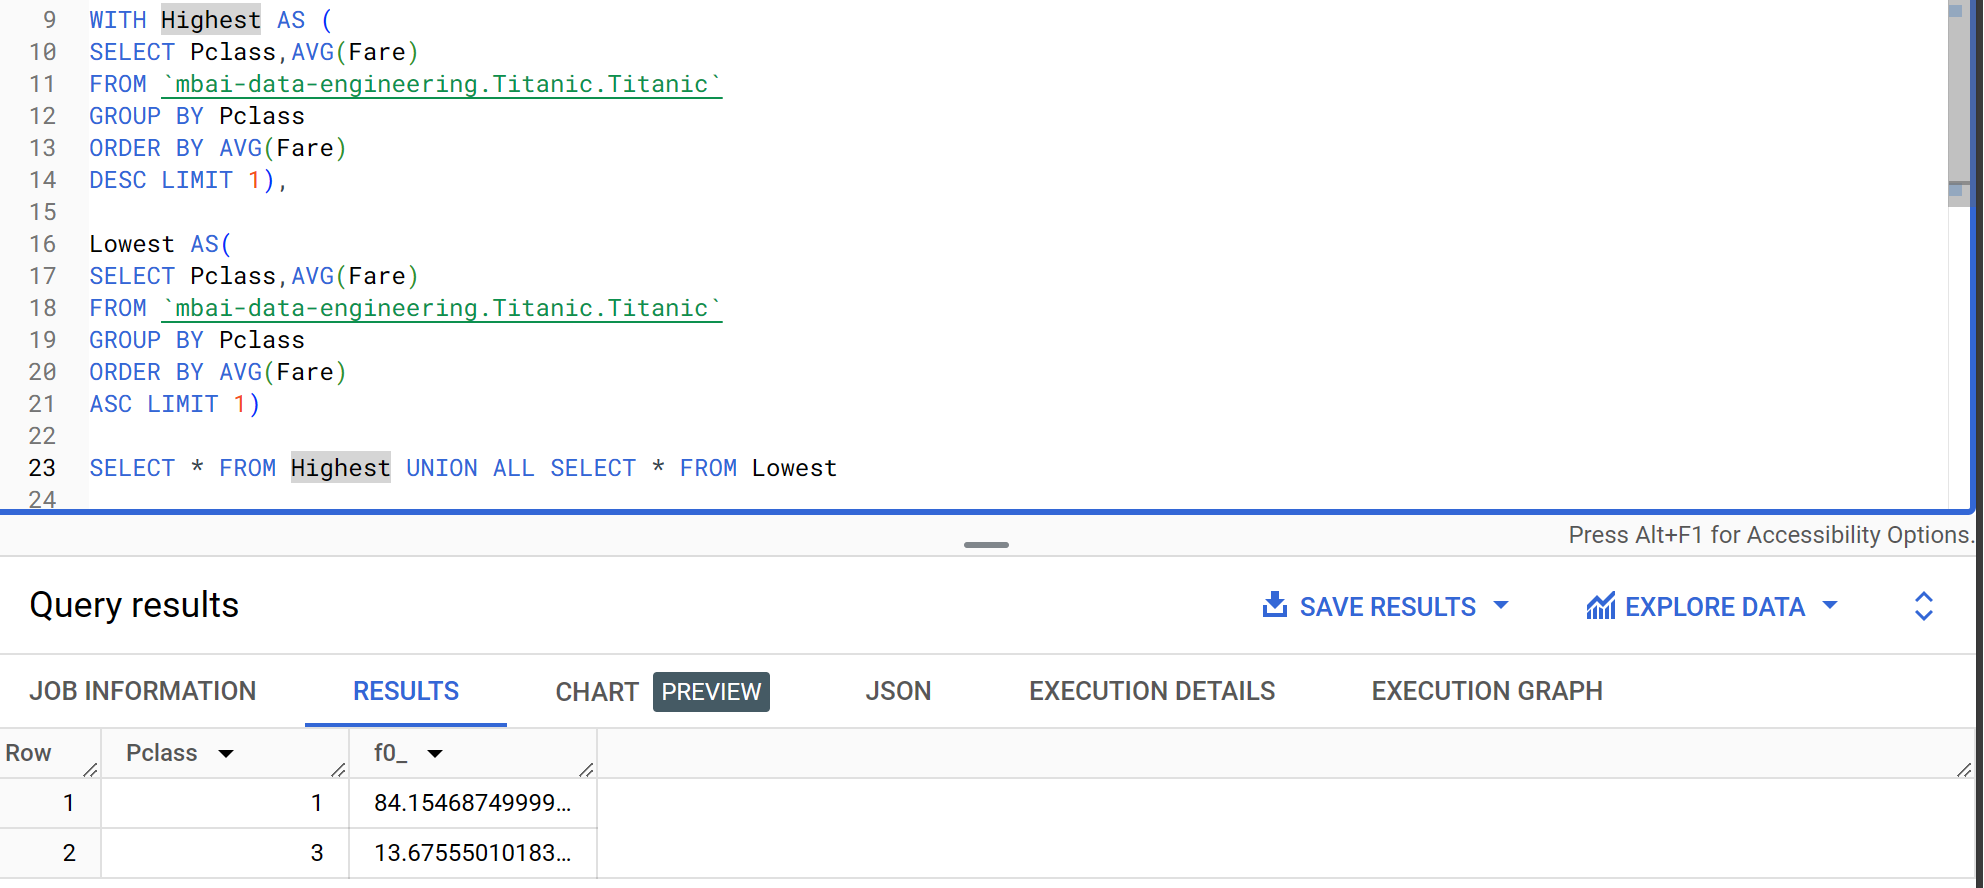

**Problem 9**

Retrieve the class, gender, and count of passengers for each class-gender combination where the count is greater than 50.

In [ ]:
#Retrieve class, gender and count of passengers
SELECT Pclass,Sex,Count(PassengerId) AS PeopleCount

FROM `mbai-data-engineering.Titanic.Titanic`

#Group by combination of class and gender
GROUP BY Pclass, Sex

#Filter for counts over 50
HAVING PeopleCount >= 50

#Sory by class for easier viewing
ORDER BY Pclass

BigQuery Output: 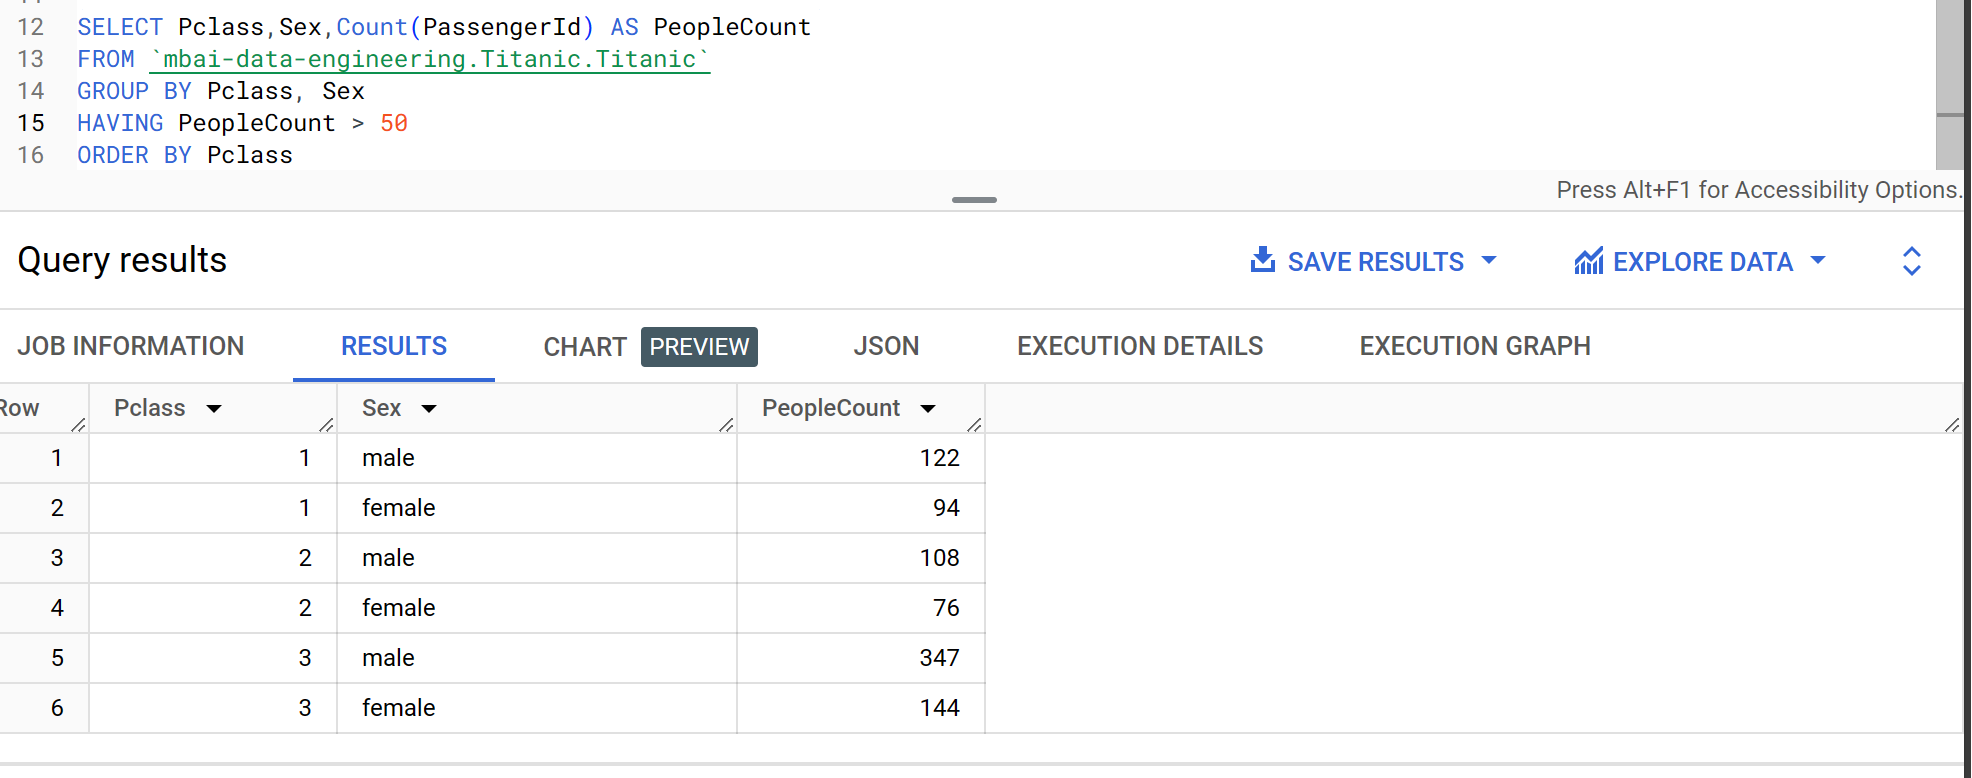

**Problem 10**

Retrieve the name and age of the oldest passenger who survived and the youngest passenger who did not survive.

In [ ]:
# Use Common Table Expression to store results for oldest survivor
WITH Oldest AS (
SELECT Name, Age
FROM `mbai-data-engineering.Titanic.Titanic`
#Survivor
WHERE Survived = 1
#Get top record by age (oldest)
ORDER BY Age DESC
LIMIT 1)

#and store result for youngest victim
, Youngest AS (
SELECT Name, Age
FROM `mbai-data-engineering.Titanic.Titanic`
#Victim, eliminate nulls
WHERE Survived = 0 AND Age IS NOT NULL
#Get the bottom record by age (youngest)
ORDER BY Age ASC
LIMIT 1)

#Output results from both CTEs at once
SELECT * FROM Oldest UNION ALL SELECT * FROM Youngest

BigQuery Output:
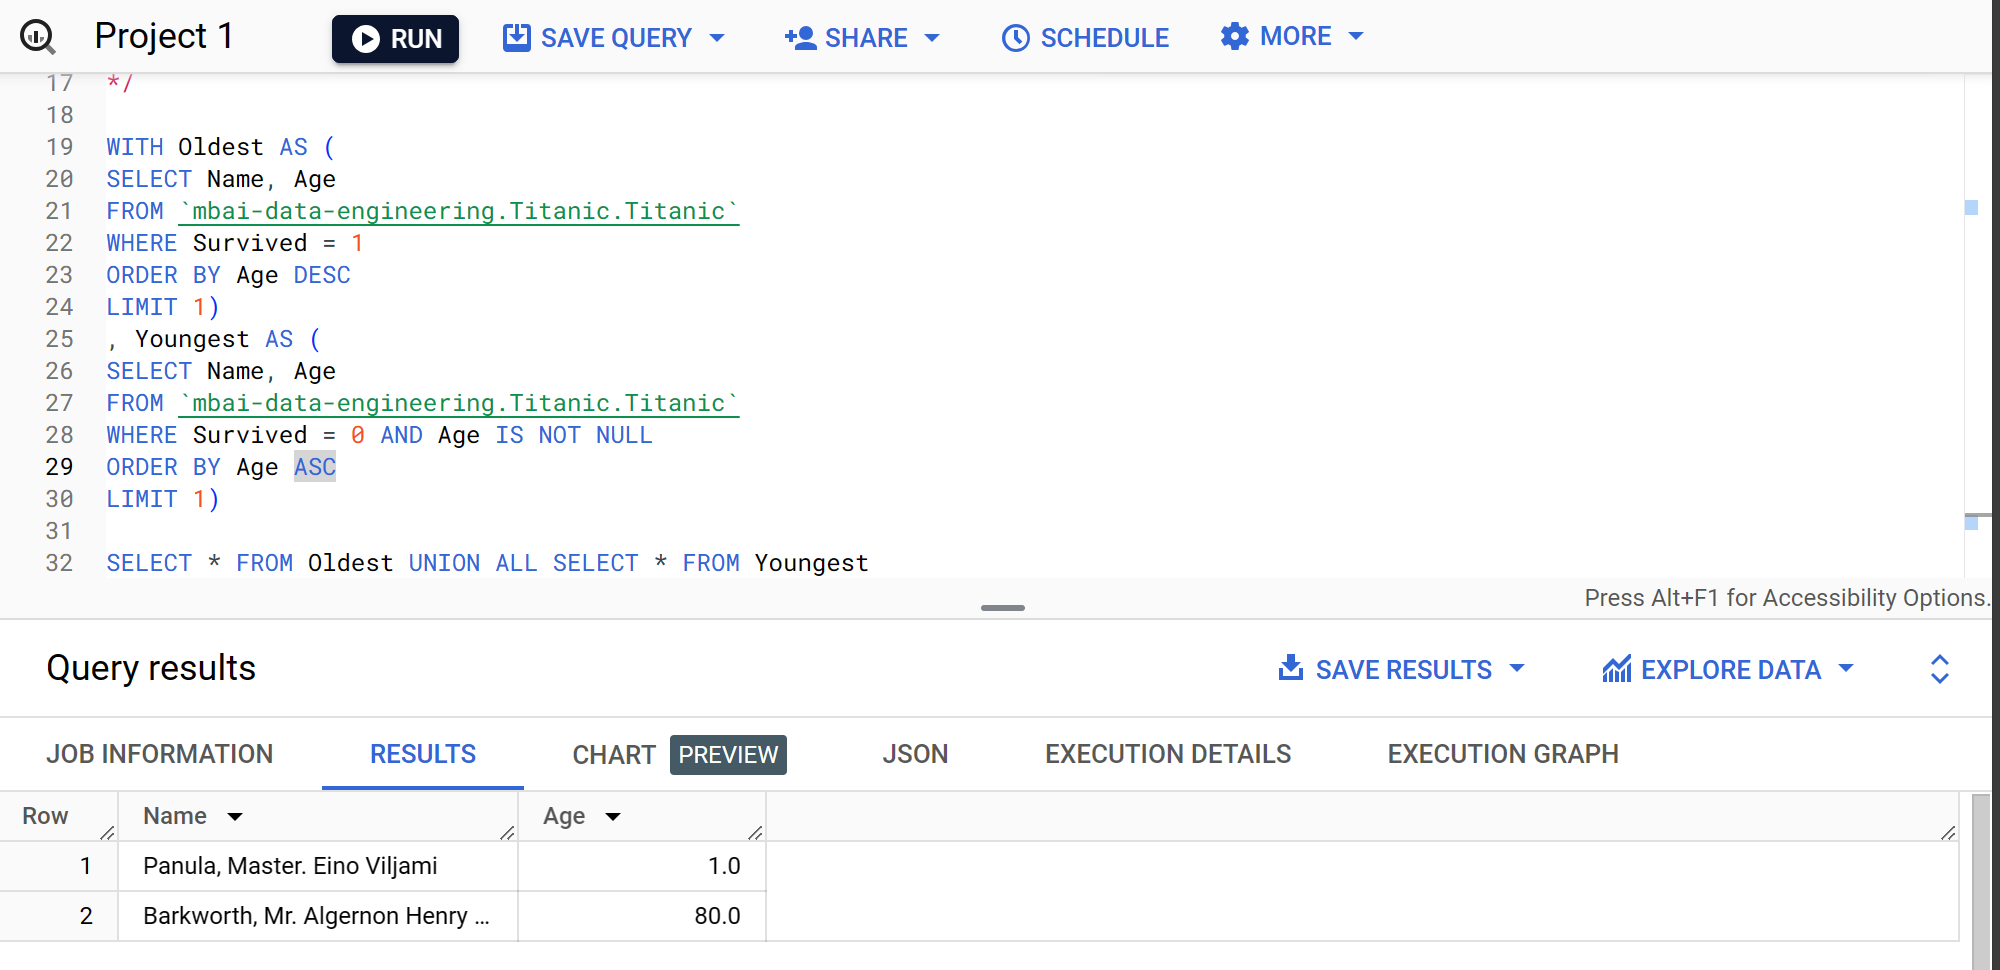

## Part 2: Joins using SQLite

We are working with the Chinook database using SQLite. The Chinook database is a sample database that represents a music store's database. Practice using SQL joins, a powerful tool for combining data from different tables.<br><br>



Download anload the Chinook database from [SQLite sample database](https://www.sqlitetutorial.net/sqlite-sample-database/). **Remember to use the ER diagram to solve these problems**.

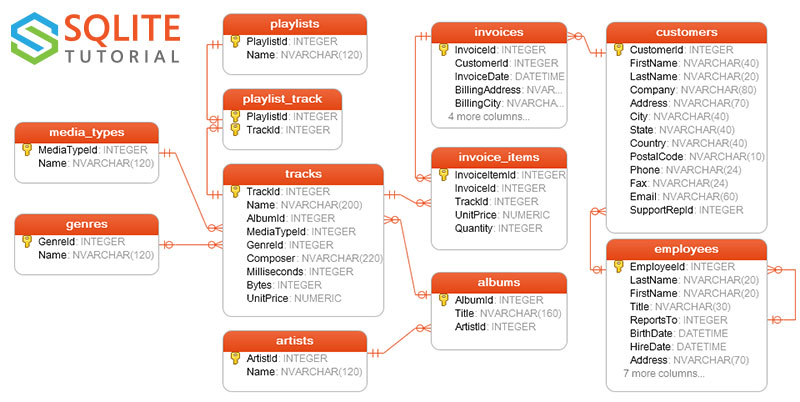

Import the SQLite library. SQLite is included in Python standard library, so there is no need to pip install

In [ ]:
#Import the library
import sqlite3

Upload your database file using the files tab on the left menu. Connect to the uploaded Chinook database file

In [ ]:
# Connect to the uploaded Chinook database file
conn = sqlite3.connect('chinook.db')

Create a cursor object

In [ ]:
#Write code bellow
cursor = conn.cursor()

**Problem 11**

Retrieve the names of all tracks and their corresponding album titles. Limit to the first 10 results.

In [ ]:
#Run the SQL query
cursor.execute('''SELECT tracks.Name, albums.Title FROM albums INNER JOIN tracks ON albums.AlbumId = tracks.AlbumId LIMIT 10''')

# Fetch all the results
results = cursor.fetchall()

# Print out the results using a f string
for result in results:
    print(f"Album Title: {result[0]}")
    print(f"   Track Name: {result[1]}")
    print("="*30)


Album Title: For Those About To Rock (We Salute You)
   Track Name: For Those About To Rock We Salute You
Album Title: Put The Finger On You
   Track Name: For Those About To Rock We Salute You
Album Title: Let's Get It Up
   Track Name: For Those About To Rock We Salute You
Album Title: Inject The Venom
   Track Name: For Those About To Rock We Salute You
Album Title: Snowballed
   Track Name: For Those About To Rock We Salute You
Album Title: Evil Walks
   Track Name: For Those About To Rock We Salute You
Album Title: C.O.D.
   Track Name: For Those About To Rock We Salute You
Album Title: Breaking The Rules
   Track Name: For Those About To Rock We Salute You
Album Title: Night Of The Long Knives
   Track Name: For Those About To Rock We Salute You
Album Title: Spellbound
   Track Name: For Those About To Rock We Salute You


**Problem 12**

Find the total number of invoices and the corresponding customer names for customers located in the USA.

In [ ]:
#Run the SQL query
cursor.execute("SELECT COUNT(*), customers.FirstName, customers.LastName FROM customers INNER JOIN invoices ON invoices.CustomerId = customers.CustomerId WHERE customers.Country = 'USA' GROUP BY customers.CustomerId")

#Fetch all outputs
results = cursor.fetchall()

#Output all queries
print(results)

[(7, 'Frank', 'Harris'), (7, 'Jack', 'Smith'), (7, 'Michelle', 'Brooks'), (7, 'Tim', 'Goyer'), (7, 'Dan', 'Miller'), (7, 'Kathy', 'Chase'), (7, 'Heather', 'Leacock'), (7, 'John', 'Gordon'), (7, 'Frank', 'Ralston'), (7, 'Victor', 'Stevens'), (7, 'Richard', 'Cunningham'), (7, 'Patrick', 'Gray'), (7, 'Julia', 'Barnett')]


**Problem 13**

Retrieve the names of all artists who have tracks in the genre 'Rock'.

In [ ]:
#Run the SQL query
cursor.execute("SELECT artists.Name FROM artists INNER JOIN albums ON artists.ArtistId = albums.ArtistId INNER JOIN tracks ON tracks.AlbumId = albums.AlbumId INNER JOIN genres ON genres.Name = 'Rock' GROUP BY artists.ArtistId")

#Fetch all outputs
record = cursor.fetchall()

#Output all queries
print(record)

[('AC/DC',), ('Accept',), ('Aerosmith',), ('Alanis Morissette',), ('Alice In Chains',), ('Antônio Carlos Jobim',), ('Apocalyptica',), ('Audioslave',), ('BackBeat',), ('Billy Cobham',), ('Black Label Society',), ('Black Sabbath',), ('Body Count',), ('Bruce Dickinson',), ('Buddy Guy',), ('Caetano Veloso',), ('Chico Buarque',), ('Chico Science & Nação Zumbi',), ('Cidade Negra',), ('Cláudio Zoli',), ('Various Artists',), ('Led Zeppelin',), ('Frank Zappa & Captain Beefheart',), ('Marcos Valle',), ('Gilberto Gil',), ('O Rappa',), ('Ed Motta',), ('Elis Regina',), ('Milton Nascimento',), ('Jorge Ben',), ('Metallica',), ('Queen',), ('Kiss',), ('Spyro Gyra',), ('Green Day',), ('David Coverdale',), ('Gonzaguinha',), ('Os Mutantes',), ('Deep Purple',), ('Santana',), ('Miles Davis',), ('Gene Krupa',), ('Toquinho & Vinícius',), ('Vinícius De Moraes',), ('Creedence Clearwater Revival',), ('Cássia Eller',), ('Def Leppard',), ('Dennis Chambers',), ('Djavan',), ('Eric Clapton',), ('Faith No More',), ('F

**Problem 14**

Find the names of customers who have purchased at least one track from the 'Alternative & Punk' genre.

In [ ]:
#Run the SQL query
cursor.execute("SELECT customers.FirstName, customers.LastName FROM customers INNER JOIN invoices ON invoices.CustomerId = customers.CustomerId INNER JOIN invoice_items ON invoice_items.InvoiceId = invoices.InvoiceId INNER JOIN tracks ON invoice_items.TrackId = tracks.TrackId INNER JOIN genres ON genres.GenreId = tracks.GenreId WHERE genres.NAME = 'Alternative & Punk' GROUP BY customers.CustomerId HAVING COUNT(*) >= 1")

#Fetch all results
record = cursor.fetchall()

#Output all queries
print(record)

[('Leonie', 'Köhler'), ('François', 'Tremblay'), ('Bjørn', 'Hansen'), ('František', 'Wichterlová'), ('Helena', 'Holý'), ('Daan', 'Peeters'), ('Kara', 'Nielsen'), ('Eduardo', 'Martins'), ('Alexandre', 'Rocha'), ('Roberto', 'Almeida'), ('Mark', 'Philips'), ('Jack', 'Smith'), ('Tim', 'Goyer'), ('Dan', 'Miller'), ('Kathy', 'Chase'), ('Heather', 'Leacock'), ('John', 'Gordon'), ('Frank', 'Ralston'), ('Victor', 'Stevens'), ('Richard', 'Cunningham'), ('Patrick', 'Gray'), ('Julia', 'Barnett'), ('Robert', 'Brown'), ('Edward', 'Francis'), ('Martha', 'Silk'), ('Ellie', 'Sullivan'), ('João', 'Fernandes'), ('Hannah', 'Schneider'), ('Fynn', 'Zimmermann'), ('Niklas', 'Schröder'), ('Camille', 'Bernard'), ('Dominique', 'Lefebvre'), ('Marc', 'Dubois'), ('Wyatt', 'Girard'), ('Isabelle', 'Mercier'), ('Terhi', 'Hämäläinen'), ('Ladislav', 'Kovács'), ('Hugh', "O'Reilly"), ('Lucas', 'Mancini'), ('Johannes', 'Van der Berg'), ('Stanisław', 'Wójcik'), ('Enrique', 'Muñoz'), ('Joakim', 'Johansson'), ('Emma', 'Jones

**Problem 15**

Retrieve the names of all tracks and their corresponding media types. Sort ascending by Genre.

In [ ]:
#Run the SQL query
cursor.execute("SELECT tracks.Name, media_types.Name, tracks.GenreId FROM tracks INNER JOIN media_types ON tracks.MediaTypeId = media_types.MediaTypeId ORDER BY tracks.GenreId ASC")

#Fetch all results
record = cursor.fetchall()

#Output all queries
print(record)

[('For Those About To Rock (We Salute You)', 'MPEG audio file', 1), ('Balls to the Wall', 'Protected AAC audio file', 1), ('Fast As a Shark', 'Protected AAC audio file', 1), ('Restless and Wild', 'Protected AAC audio file', 1), ('Princess of the Dawn', 'Protected AAC audio file', 1), ('Put The Finger On You', 'MPEG audio file', 1), ("Let's Get It Up", 'MPEG audio file', 1), ('Inject The Venom', 'MPEG audio file', 1), ('Snowballed', 'MPEG audio file', 1), ('Evil Walks', 'MPEG audio file', 1), ('C.O.D.', 'MPEG audio file', 1), ('Breaking The Rules', 'MPEG audio file', 1), ('Night Of The Long Knives', 'MPEG audio file', 1), ('Spellbound', 'MPEG audio file', 1), ('Go Down', 'MPEG audio file', 1), ('Dog Eat Dog', 'MPEG audio file', 1), ('Let There Be Rock', 'MPEG audio file', 1), ('Bad Boy Boogie', 'MPEG audio file', 1), ('Problem Child', 'MPEG audio file', 1), ('Overdose', 'MPEG audio file', 1), ("Hell Ain't A Bad Place To Be", 'MPEG audio file', 1), ('Whole Lotta Rosie', 'MPEG audio file'

**Close**

In [ ]:
# Close the connection
conn.close()